In [132]:
# This is learning time-series data 
# one stock analysis - outcome should be comparable.
# To build one page view of stock
# Month - Week - Day chart of Return
# Draw last 5 Support and Resistance

# Signal on Buy 


    # if (row['RSI'] < 30 and
    #     row['Close'] < row['LB'] and
    #     row['ATR'] > row['d_rtn'] and
    #     row['Volume'] > row['VWAP']): !>

In [133]:
# libraries 

from getData import get_data, get_ohlcv
from technical_indicator import LR, MACD, RSI, BB, ATR, ADX, RENKO, anomaly, historical_volatility, get_support_resistance_levels, VWAP
from Returns import cummulative_returns, CAGR, volatility, SHARPE, SORTINO, MAXDROWDOWN, CALMAR
from signals import stratgey1_mean_reversion

import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import copy

%load_ext autoreload
%autoreload 2
pd.set_option('mode.chained_assignment', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Getting Data

In [134]:
tickers = ['IOC.NS']
tickers

['IOC.NS']

In [135]:
# Store data in dictionary
ohlcv_dict = {}
for stock in tickers:
    ohlcv_dict[stock] = get_ohlcv(ticker=stock, period = '5y', interval='1d', multi_level_index=False)
    # ohlcv_dict[stock] = ohlcv_dict[stock].between_time('09:35', '16:00')

[*********************100%***********************]  1 of 1 completed


In [136]:
data = copy.deepcopy(ohlcv_dict)

## Analysis

In [137]:
# data

# Calculation on Data

In [138]:
for stock_name in tickers:
    cummulative_returns(data[stock_name])
    ATR(data[stock_name])
    anomaly(data[stock_name])
    support, resistnace  = get_support_resistance_levels(data[stock_name])
    data[stock_name]['support'] = support
    data[stock_name]['resistance'] = resistnace
    historical_volatility(data[stock_name])
    historical_volatility(data[stock_name])
    RSI(data[stock_name])
    VWAP(data[stock_name])
    BB(data[stock_name])
    data[stock_name]['Close'] = round(data[stock_name]['Close'],2)
    data[stock_name]['Signal'] = data[stock_name].apply(stratgey1_mean_reversion, axis=1)
    print('--')

--


In [139]:
# data

In [140]:
df = data[stock_name]
resistance = df.loc[df['resistance']>1]['resistance'].tail(3)
resistance.name = 'Close'
# resistance
resistance_levels = [
    {"date": date.strftime("%Y-%m-%d"), "Close": round(Close,2)}
    for date, Close in resistance.items()
]
# resistance_levels

support = df.loc[df['support']>1]['support'].tail(3)
support.name = 'Close'
# resistance
support_levels = [
    {"date": date.strftime("%Y-%m-%d"), "Close": round(Close,2)}
    for date, Close in support.items()
]
# support_levels

# Buy
buy = df.loc[df['Signal'] ==1]['Close'].tail(5)
buy.name = 'Close'

# Sell
sell = df.loc[df['Signal'] ==-1]['Close'].tail(5)
sell.name = 'Close'

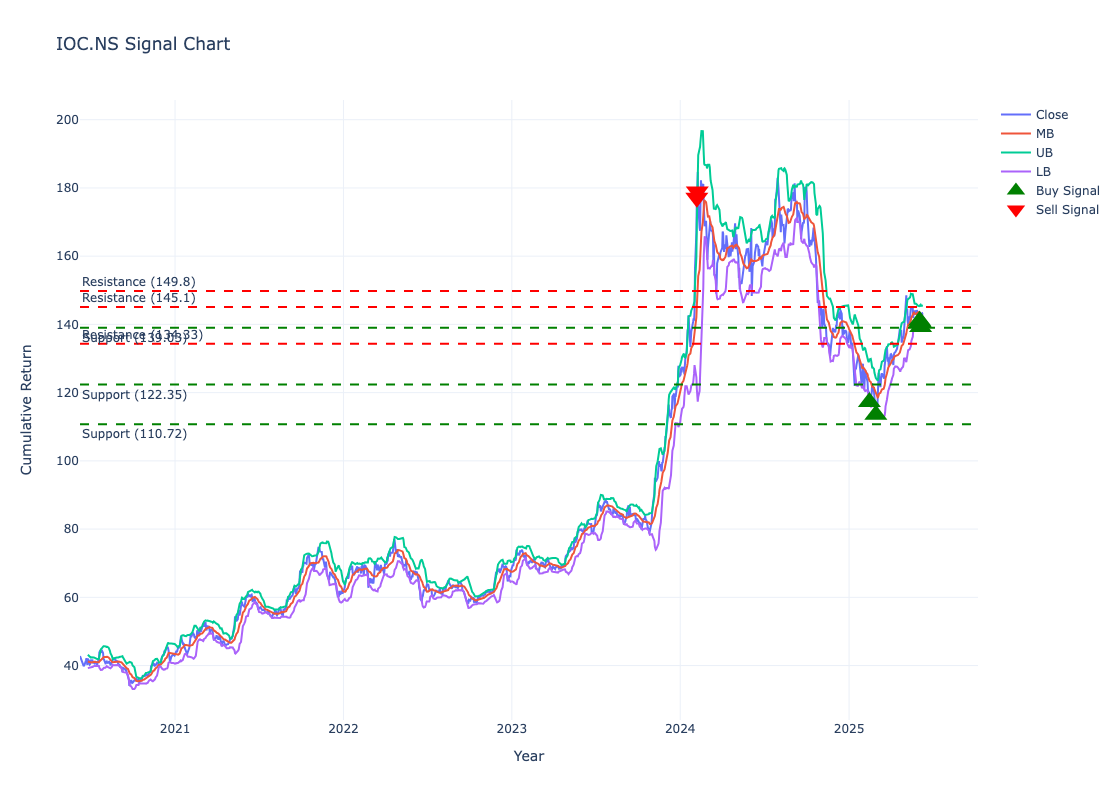

In [141]:
fig = go.Figure()
#Close
for key in data:
    fig.add_trace(go.Scatter(
        x=data[key].index,
        y=data[key]['Close'],
        mode='lines',  # Set the mode to 'lines' for a line chart
        name='Close'# Use the name for each line from the dictionary
    ))   
for key in data:
    fig.add_trace(go.Scatter(
        x=data[key].index,
        y=data[key]['MB'],
        mode='lines',  # Set the mode to 'lines' for a line chart
        name='MB'# Use the name for each line from the dictionary
    ))

for key in data:
    fig.add_trace(go.Scatter(
        x=data[key].index,
        y=data[key]['UB'],
        mode='lines',  # Set the mode to 'lines' for a line chart
        name='UB'# Use the name for each line from the dictionary
    ))
    
for key in data:
    fig.add_trace(go.Scatter(
        x=data[key].index,
        y=data[key]['LB'],
        mode='lines',  # Set the mode to 'lines' for a line chart
        name='LB'# Use the name for each line from the dictionary
    )) 


for level in support_levels:
    fig.add_hline(
        y=level["Close"],
        line=dict(color="green", dash="dash"),
        annotation_text=f"Support ({level['Close']})",
        annotation_position="bottom left"
    )

# Add resistance lines
for level in resistance_levels:
    fig.add_hline(
        y=level["Close"],
        line=dict(color="red", dash="dash"),
        annotation_text=f"Resistance ({level['Close']})",
                annotation_position="top left"
    )

#Buy
fig.add_trace(go.Scatter(
    x=buy.index,
    y=buy.values,
    mode='markers',
    name='Buy Signal',
    marker=dict(color='green', size=20, symbol='triangle-up')
    ))


#Sell
fig.add_trace(go.Scatter(
    x=sell.index,
    y=sell.values,
    mode='markers',
    name='Sell Signal',
    marker=dict(color='red', size=20, symbol='triangle-down')
    ))

# Customize the layout
fig.update_layout(
    title=f"{stock_name} Signal Chart",
    xaxis_title="Year",
    yaxis_title="Cumulative Return",
    autosize=False,
    width=1100,
    height=800,
    template='plotly_white'
)

fig.show()

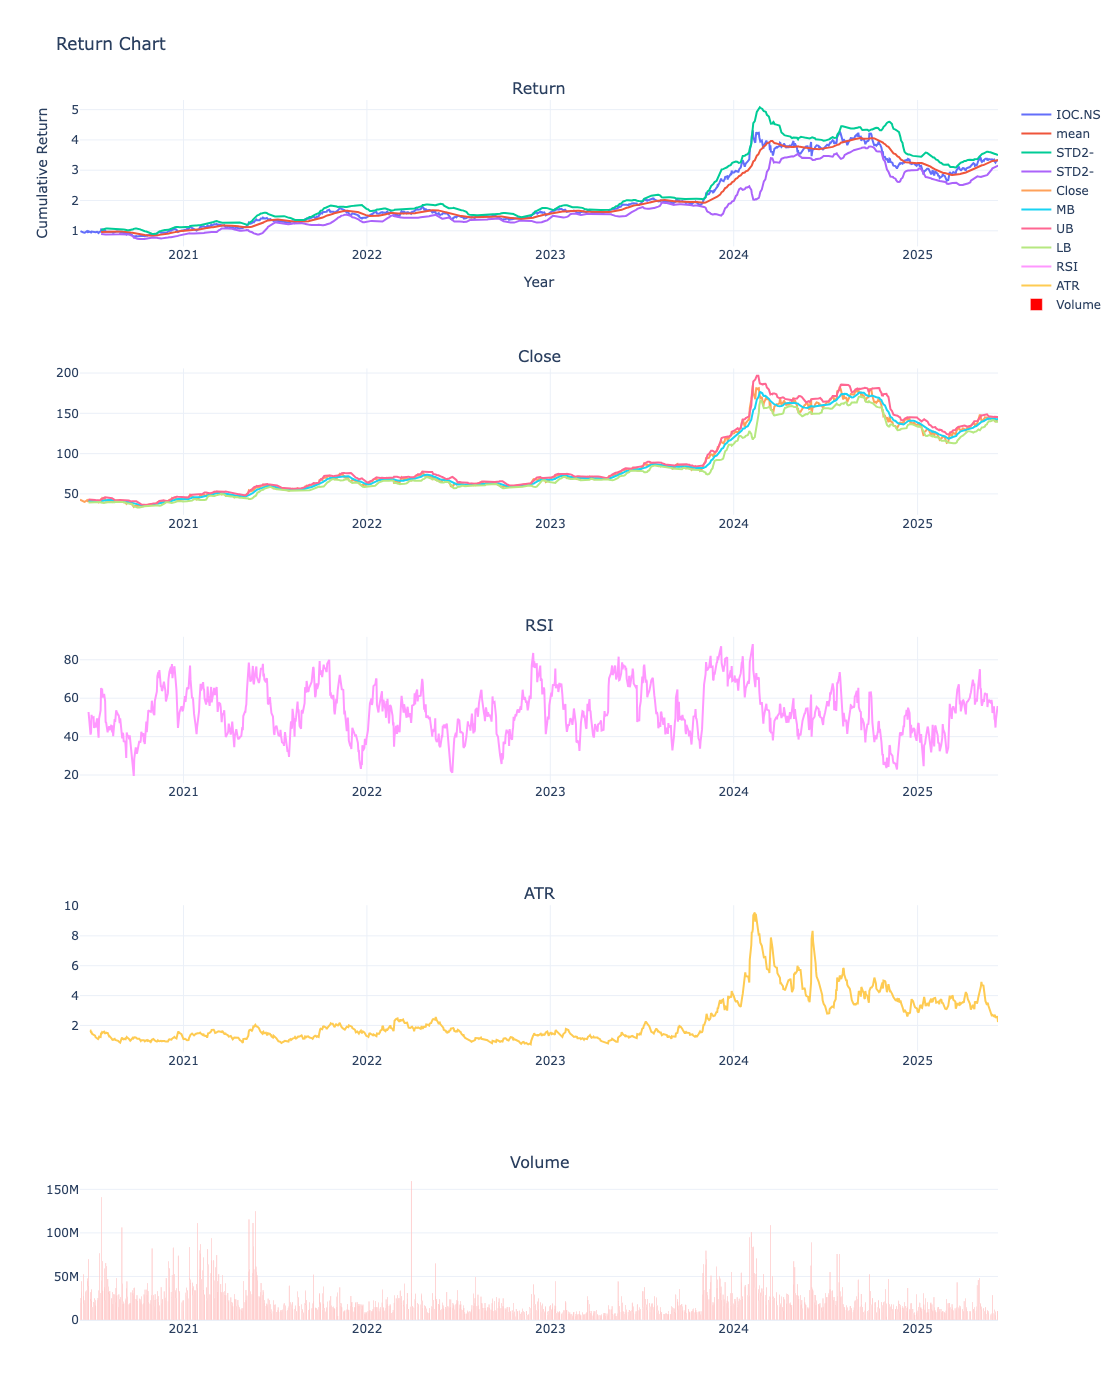

In [142]:
# Create a line chart
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# fig = go.Figure()

fig = make_subplots(
    rows=5, cols=1,
    subplot_titles=("Return", "Close", "RSI", "ATR", "Volume"))





# Add multiple lines (traces) to the figure
for key in data:
    fig.add_trace(go.Scatter(
        x=data[key].index,
        y=data[key]['cum_rtn'],
        mode='lines',  # Set the mode to 'lines' for a line chart
        name=key# Use the name for each line from the dictionary
    ),  row=1, col=1,)

for key in data:
    fig.add_trace(go.Scatter(
        x=data[key].index,
        y=data[key]['r_mean'],
        mode='lines',  # Set the mode to 'lines' for a line chart
        name='mean'# Use the name for each line from the dictionary
    ),row=1, col=1,)

for key in data:
    fig.add_trace(go.Scatter(
        x=data[key].index,
        y=data[key]['r_std2+'],
        mode='lines',  # Set the mode to 'lines' for a line chart
        name='STD2-'# Use the name for each line from the dictionary
    ),row=1, col=1,)
    
for key in data:
    fig.add_trace(go.Scatter(
        x=data[key].index,
        y=data[key]['r_std2-'],
        mode='lines',  # Set the mode to 'lines' for a line chart
        name='STD2-'# Use the name for each line from the dictionary
    ),row=1, col=1,)   

#Close
for key in data:
    fig.add_trace(go.Scatter(
        x=data[key].index,
        y=data[key]['Close'],
        mode='lines',  # Set the mode to 'lines' for a line chart
        name='Close'# Use the name for each line from the dictionary
    ),row=2, col=1,)   
for key in data:
    fig.add_trace(go.Scatter(
        x=data[key].index,
        y=data[key]['MB'],
        mode='lines',  # Set the mode to 'lines' for a line chart
        name='MB'# Use the name for each line from the dictionary
    ),row=2, col=1,)

for key in data:
    fig.add_trace(go.Scatter(
        x=data[key].index,
        y=data[key]['UB'],
        mode='lines',  # Set the mode to 'lines' for a line chart
        name='UB'# Use the name for each line from the dictionary
    ),row=2, col=1,)
    
for key in data:
    fig.add_trace(go.Scatter(
        x=data[key].index,
        y=data[key]['LB'],
        mode='lines',  # Set the mode to 'lines' for a line chart
        name='LB'# Use the name for each line from the dictionary
    ),row=2, col=1,) 

#RSI

for key in data:
    fig.add_trace(go.Scatter(
        x=data[key].index,
        y=data[key]['RSI'],
        mode='lines',  # Set the mode to 'lines' for a line chart
        name='RSI'# Use the name for each line from the dictionary
    ),row=3, col=1,)   


#ATR

for key in data:
    fig.add_trace(go.Scatter(
        x=data[key].index,
        y=data[key]['ATR'],
        mode='lines',  # Set the mode to 'lines' for a line chart
        name='ATR'# Use the name for each line from the dictionary
    ),row=4, col=1,)   

#Volume

for key in data:
    fig.add_trace(go.Bar(
        x=data[key].index,
        y=data[key]['Volume'],
        name='Volume',# Use the name for each line from the dictionary
        marker=dict(color='red')
    ),row=5, col=1,)   


# Customize the layout
fig.update_layout(
    title="Return Chart",
    xaxis_title="Year",
    yaxis_title="Cumulative Return",
    autosize=False,
    width=1100,
    height=1400,
    template='plotly_white'
)

# Show the plot
fig.show()